###### Small/Medium Hass Avocado (~3-5oz avocado) | #4046 Avocado

###### Large Hass Avocado (~8-10oz avocado) | #4225 Avocado

###### Extra Large Hass Avocado (~10-15oz avocado) | #4770 Avocado

###### Hass Avocado Bags | Size varies

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
# import regression module
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
# import train/test split module
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Charting libraries
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [50]:
Avos=pd.read_csv("/Users/damac20/Downloads/avos_avocado_updated.csv")
Avos.head()

,Month,Month.1,Day,Year,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Date
0,12,12,27,2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015-12-27
1,12,12,20,2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015-12-20
2,12,12,13,2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015-12-13
3,12,12,6,2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015-12-06
4,11,11,29,2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015-11-29


In [51]:
Avos.drop('Month.1',axis=1)

,Month,Day,Year,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Date
0,12,27,2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015-12-27
1,12,20,2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015-12-20
2,12,13,2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015-12-13
3,12,6,2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015-12-06
4,11,29,2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015-11-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2,4,2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2018-02-04
18245,1,28,2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,2018-01-28
18246,1,21,2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,2018-01-21
18247,1,14,2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,2018-01-14


In [39]:
Avos=Avos.rename(columns={'4046':'small_medium_avo','4225':'large_avo','4770':'extra_large_avo','Date':'Day'})
Avos.head(5)

,Month,Day,Year,AveragePrice,Total Volume,small_medium_avo,large_avo,extra_large_avo,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,12,27,2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0
1,12,20,2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0
2,12,13,2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0
3,12,6,2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0
4,11,29,2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0


###### Encoding string variables

In [3]:
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
Avos['type'] = labelencoder.fit_transform(Avos['type'])
Avos['region'] = labelencoder.fit_transform(Avos['region'])
Avos

,Month,Date,Year,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,12,27,2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0
1,12,20,2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0
2,12,13,2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0
3,12,6,2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0
4,11,29,2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2,4,2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,53
18245,1,28,2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,53
18246,1,21,2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,53
18247,1,14,2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,53


###### Cleaning our dataset

In [4]:
Avos.isnull().sum()

Month           0
Date            0
Year            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
region          0
dtype: int64

In [5]:
Avos.duplicated().sum()

0

In [6]:
Avos.describe()

,Month,Date,Year,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
count,18249.000000,18249.000000,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000
mean,6.177215,15.662612,2016.147899,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,26.495644
std,3.534130,8.776281,0.939938,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,15.583788
min,1.000000,1.000000,2015.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,3.000000,8.000000,2015.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,13.000000
50%,6.000000,16.000000,2016.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,26.000000
75%,9.000000,23.000000,2017.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,40.000000
max,12.000000,31.000000,2018.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,53.000000


###### EDA

In [7]:
Avos["region"].value_counts().unique()

array([338, 335])

In [8]:
Avos["Year"].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: Year, dtype: int64

In [9]:
Avos["type"].value_counts()

0    9126
1    9123
Name: type, dtype: int64

In [11]:
# searching fro empty rows
L = Avos.index[Avos.isna().all(axis=1)].tolist()
L

[]

In [46]:
def line(data,x,y,title,xlabel,ylabel):
    
    fig = px.line(data,x=x, y=y)
    
    fig.update_layout(
    title = {'text':'<b>{}</b>'.format(title.title()),
         'y':0.9, 
         'x':0.5,
         'xanchor': 'center',
         'yanchor': 'top' },
    xaxis_title=xlabel,
    yaxis_title=ylabel
    )
    

    fig.show()

#### EDA

0    9126
1    9123
Name: type, dtype: int64


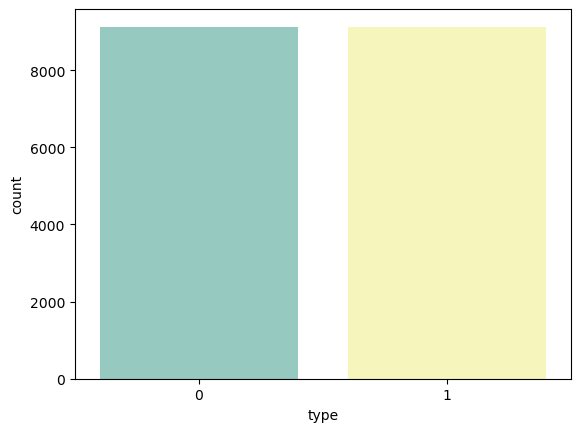

In [42]:
print(Avos['type'].value_counts())
sns.countplot('type', data=Avos, palette='Set3')

plt.show()

In [44]:
# The percentage of average price on each type
fig_1 = px.pie(Avos, values='AveragePrice', names='type', color_discrete_sequence=px.colors.sequential.RdBu)
fig_1.show()

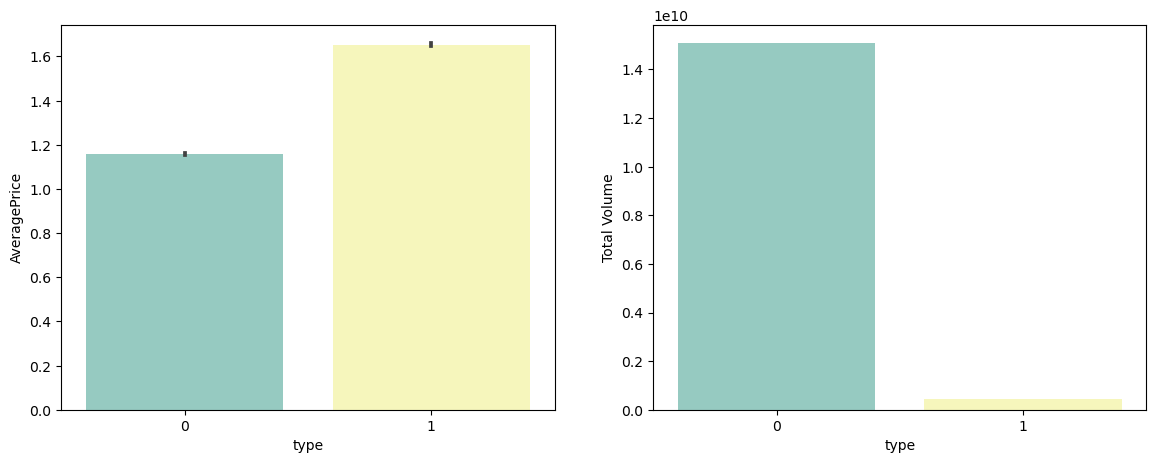

type
0    1.158040
1    1.653999
Name: AveragePrice, dtype: float64

type
0    1.508722e+10
1    4.361817e+08
Name: Total Volume, dtype: float64

In [45]:
#which type sells better and more expensive

fig, ax = plt.subplots(1, 2, figsize=(14,5))


sns.barplot(x='type', y='AveragePrice', data=Avos, palette='Set3', ax=ax[0])
sns.barplot(x='type', y='Total Volume', data=Avos, palette='Set3', ax=ax[1], estimator=sum, ci=None)
plt.show()

display(Avos.groupby('type')['AveragePrice'].mean())
display(Avos.groupby('type')['Total Volume'].sum())

In [60]:
conventional_avocado = Avos[Avos['type']=='conventional']
organic_avocado = Avos[Avos['type']=='organic']

Prices for 2017 were the highest overall.

There is an increase in avocado prices for both organic and conventional types.

The lowest price occured in the year of 2015 for conventional and organic in 2016

Text(78.72222222222221, 0.5, 'AveragePrice')

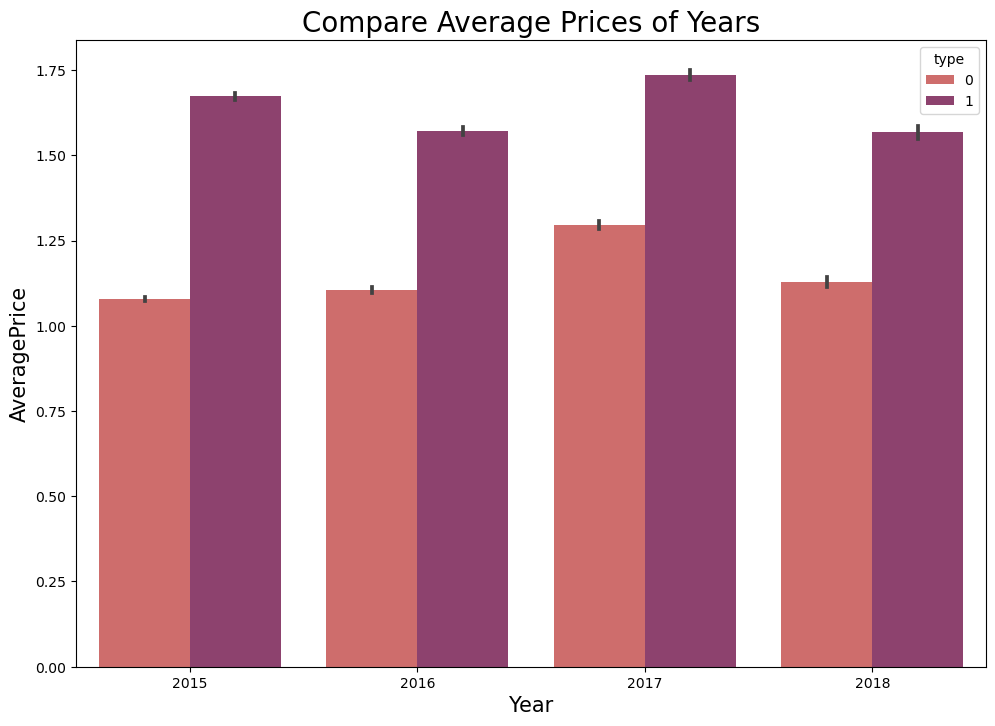

In [48]:
f,ax = plt.subplots(figsize = (10,7))
sns.barplot(x="Year", y="AveragePrice",hue="type",data=Avos,palette="flare")
plt.tight_layout() 
plt.title("Compare Average Prices of Years",fontsize = 20,color='black')
plt.xlabel('Year',fontsize = 15,color='black')
plt.ylabel('AveragePrice',fontsize = 15,color='black')

In [57]:
Avos['Date']=pd.to_datetime(Avos['Date'], format='%Y-%m-%d',errors='coerce')
Avos['year'] = Avos['Date']

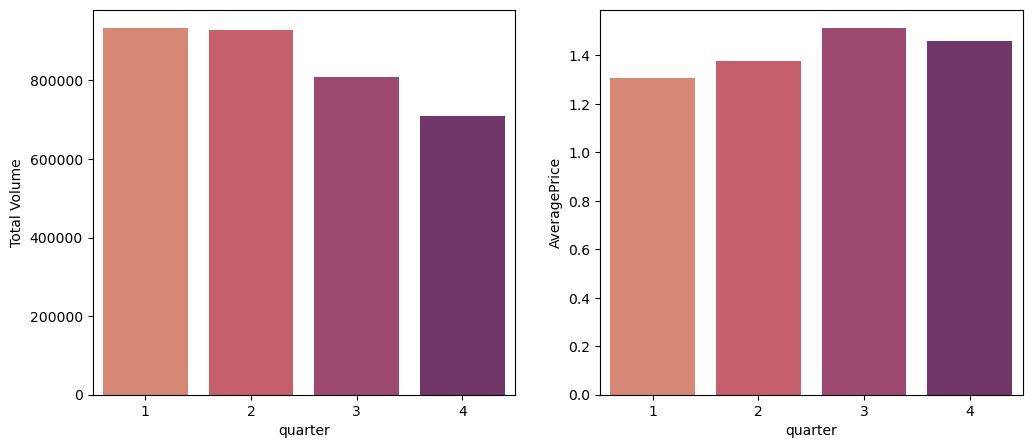

,Total Volume,AveragePrice
quarter,,
1,933371.788252,1.306605
2,928527.872254,1.375033
3,808062.047498,1.512913
4,710750.427752,1.458588


In [58]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

Avos['quarter'] = Avos['Date'].dt.quarter


sns.barplot(x='quarter', y='Total Volume', data=Avos, palette='flare', ci=None, ax=ax[0])
sns.barplot(x='quarter', y='AveragePrice', data=Avos, palette='flare', ci=None, ax=ax[1])


plt.show()

quarter = Avos.groupby('quarter')[['Total Volume', 'AveragePrice']].mean()
display(quarter)

conventional and organic avocados.
Conventional: At the end of 2017 we can see a large drop in prices, at the same time there is an increasing amount of volume of avocados in the market.


Organic: Same happens with organic avocados, at the end of 2017 there is a big drop and we can see a huge increase in volume.

In [61]:
monthly_org = organic_avocado.groupby('Year',sort=False
)['Total Volume'].sum()
line(monthly_org, x=monthly_org.index, y=monthly_org.values, title='Organic Avocado Sales by years', xlabel='Years',ylabel='Total Volume',)

In [62]:
monthly_conv = conventional_avocado.groupby('Year',sort=False
)['Total Volume'].sum()
line(monthly_conv, x=monthly_conv.index, y=monthly_conv.values, title='Conventional Avocado Sales by years', xlabel='Years',ylabel='Total Volume',)

In [64]:
monthly_conv = conventional_avocado.groupby('Month',sort=False
)['Total Volume'].sum()
line(monthly_conv, x=monthly_conv.index, y=monthly_conv.values, title='Conventional Avocado Sales by Month', xlabel='month',ylabel='Total Volume')

In [79]:
monthly_org = organic_avocado.groupby('Month',sort=False
)['Total Volume'].sum()
line(monthly_org, x=monthly_org.index, y=monthly_org.values, title='Organic Avocado Sales by Month', xlabel='months',ylabel='Total Volume',)

The most significant upward trend happens between jan(1) - may(5) for organic avocados and June - October for conventional avocado types. Both types of avocados have a similar trend.

In [66]:
monthly_org = organic_avocado.groupby('Day',sort=True
)['Total Volume'].sum()
line(monthly_org, x=monthly_org.index, y=monthly_org.values, title='Organic Avocado Sales by days', xlabel='days',ylabel='Total Volume',)

In [67]:
monthly_org = organic_avocado.groupby('Day',sort=True
)['Total Volume'].sum()
line(monthly_org, x=monthly_org.index, y=monthly_org.values, title='Organic Avocado Sales by days', xlabel='days',ylabel='Total Volume',)

Text(0.5, 1.0, 'Average Price by Day')

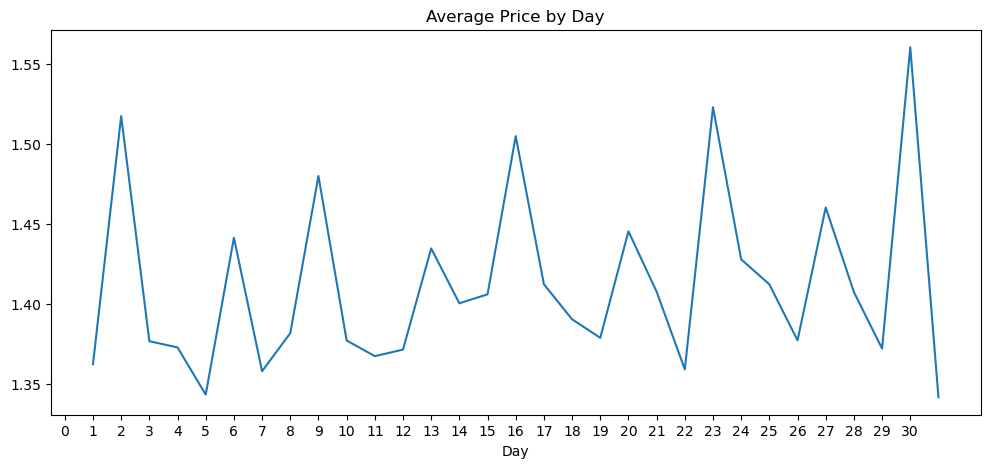

In [68]:
dategroup=Avos.groupby('Day').mean()
fig, ax = plt.subplots(figsize=(12,5))
ax.xaxis.set(ticks=range(0,31)) # Manually set x-ticks
dategroup['AveragePrice'].plot(x=Avos.Day)
plt.title('Average Price by Day')

Text(0.5, 1.0, 'Average Price by Month')

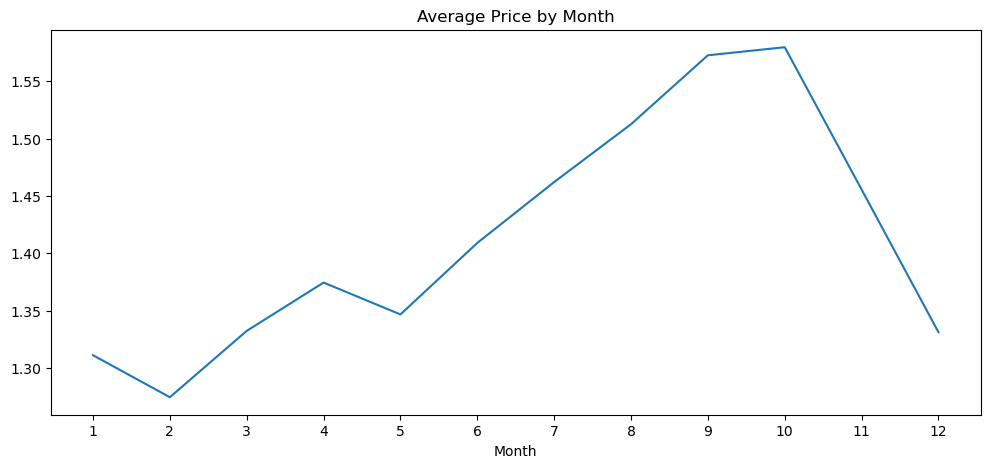

In [69]:
dategroup=Avos.groupby('Month').mean()
fig, ax = plt.subplots(figsize=(12,5))
ax.xaxis.set(ticks=range(0,31)) # Manually set x-ticks
dategroup['AveragePrice'].plot(x=Avos.Day)
plt.title('Average Price by Month')

The above visual clearly shows that Avg Price of avocado has an affect on the sales. The sales are high when the Avg price is low and vice versa.

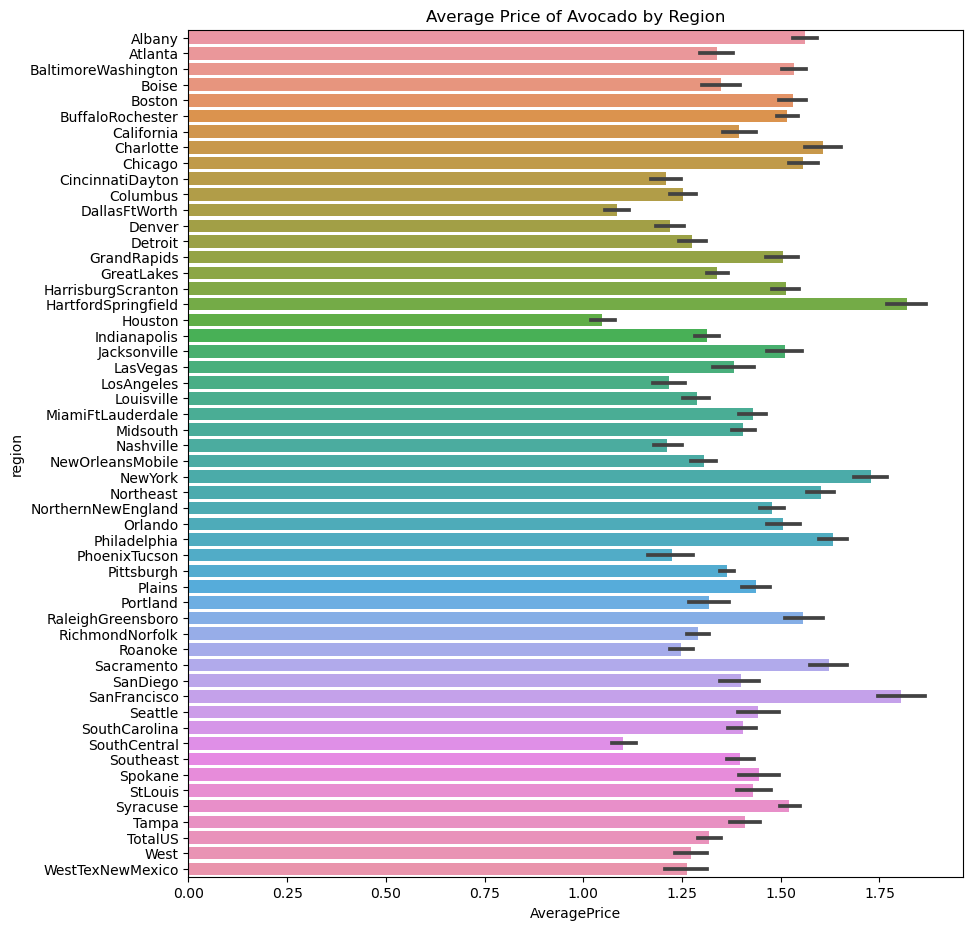

In [70]:
# The average prices by regions
plt.figure(figsize=(10,11))
plt.title("Average Price of Avocado by Region")
sns.barplot(y="region",x="AveragePrice", data= Avos)
plt.show()

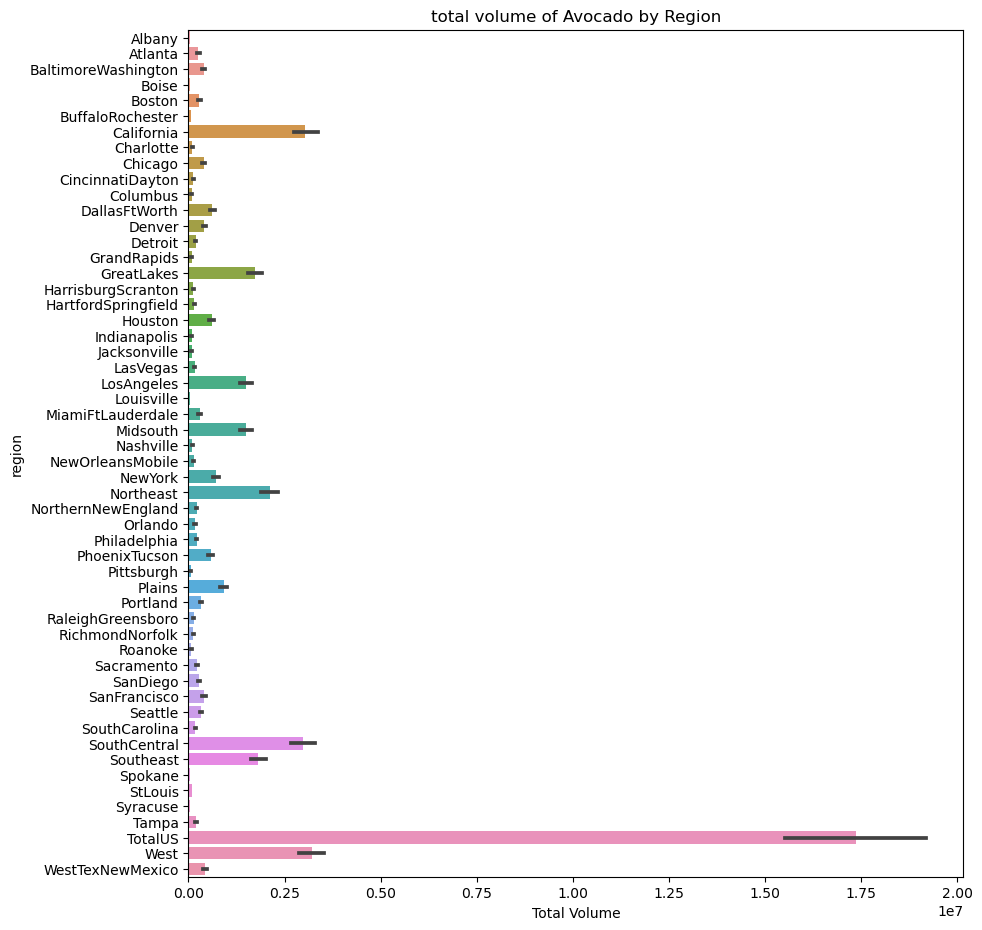

In [71]:
# The  total volume by regions
plt.figure(figsize=(10,11))
plt.title("total volume of Avocado by Region")
sns.barplot(y="region",x="Total Volume", data= Avos)
plt.show()

In [72]:
def seasonsonalChange(Avos):
        Avos['season']=Avos['Date'].dt.month
        season_dict ={3:'Spring',4:'Spring',5:'Spring', 6:'Summer',7:'Summer', 8:'Summer',9:'Fall',
                  10:'Fall', 11:'Fall',12:'Winter',1:'Winter',2:'Winter'}
        Avos['season'] = Avos['Month'].map(season_dict)
 
        return Avos

In [73]:
seasonsonalChange(Avos)

,Month,Month.1,Day,Year,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Date,year,quarter,season
0,12,12,27,2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015-12-27,2015-12-27,4,Winter
1,12,12,20,2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015-12-20,2015-12-20,4,Winter
2,12,12,13,2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015-12-13,2015-12-13,4,Winter
3,12,12,6,2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015-12-06,2015-12-06,4,Winter
4,11,11,29,2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015-11-29,2015-11-29,4,Fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2,2,4,2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2018-02-04,2018-02-04,1,Winter
18245,1,1,28,2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,2018-01-28,2018-01-28,1,Winter
18246,1,1,21,2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,2018-01-21,2018-01-21,1,Winter
18247,1,1,14,2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,2018-01-14,2018-01-14,1,Winter


In [74]:
def monthlyChange(Avos):
        Avos['months']=Avos['Date'].dt.month
        season_dict ={1:'january',2:'february',3:'march', 4:'april',5:'may', 6:'june',7:'july',
                  8:'August', 9:'September',10:'October',11:'November',12:'December'}
        Avos['months'] = Avos['Month'].map(season_dict)
 
        return Avos

In [75]:
monthlyChange(Avos)

,Month,Month.1,Day,Year,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Date,year,quarter,season,months
0,12,12,27,2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015-12-27,2015-12-27,4,Winter,December
1,12,12,20,2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015-12-20,2015-12-20,4,Winter,December
2,12,12,13,2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015-12-13,2015-12-13,4,Winter,December
3,12,12,6,2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015-12-06,2015-12-06,4,Winter,December
4,11,11,29,2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015-11-29,2015-11-29,4,Fall,November
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2,2,4,2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2018-02-04,2018-02-04,1,Winter,february
18245,1,1,28,2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,2018-01-28,2018-01-28,1,Winter,january
18246,1,1,21,2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,2018-01-21,2018-01-21,1,Winter,january
18247,1,1,14,2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,2018-01-14,2018-01-14,1,Winter,january


In [80]:
#Create a summary table description table reflecting each region and its total bags.

Avos[['region','Total Bags']].describe(include='O')
Avos[['region','Total Bags']].groupby('region').agg({'Total Bags':'sum'})

,Total Bags
region,
Albany,2.680255e+06
Atlanta,2.856051e+07
BaltimoreWashington,3.530615e+07
Boise,5.399412e+06
Boston,2.149548e+07
BuffaloRochester,1.161075e+07
California,2.466822e+08
Charlotte,1.169794e+07
Chicago,1.686540e+07


/Users/damac20/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



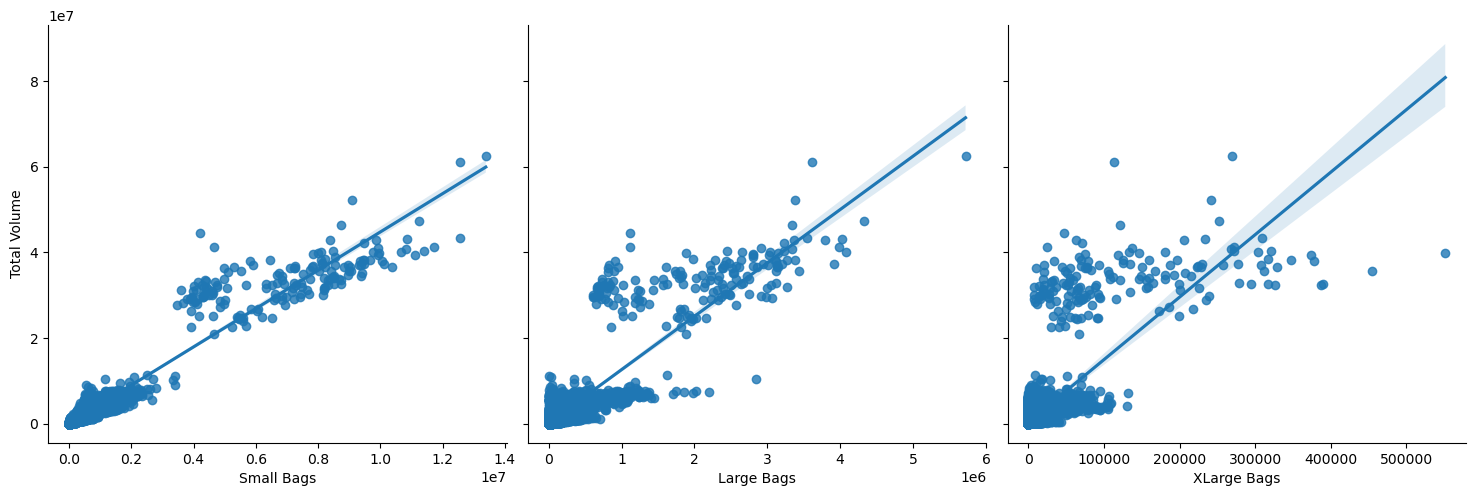

In [81]:
sns.pairplot(Avos, x_vars=['Small Bags', 'Large Bags', 'XLarge Bags'], y_vars='Total Volume', size=5, aspect=1, kind='reg')

Text(0.5, 1.0, 'Average Price by Month')

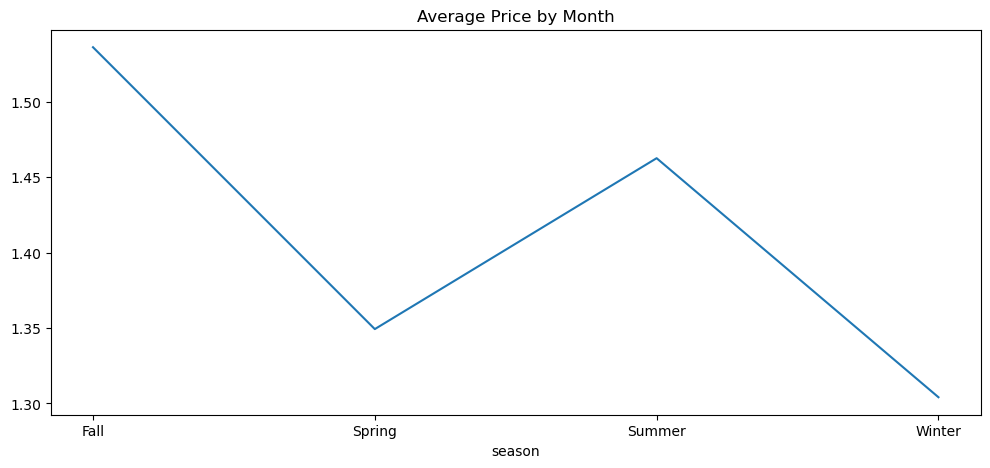

In [82]:
dategroup=Avos.groupby('season').mean()
fig, ax = plt.subplots(figsize=(12,5))
ax.xaxis.set(ticks=range(0,31)) # Manually set x-ticks
dategroup['AveragePrice'].plot(x=Avos.Day)
plt.title('Average Price by Month')

Text(0.5, 1.0, 'The quantity Supplied per seasons')

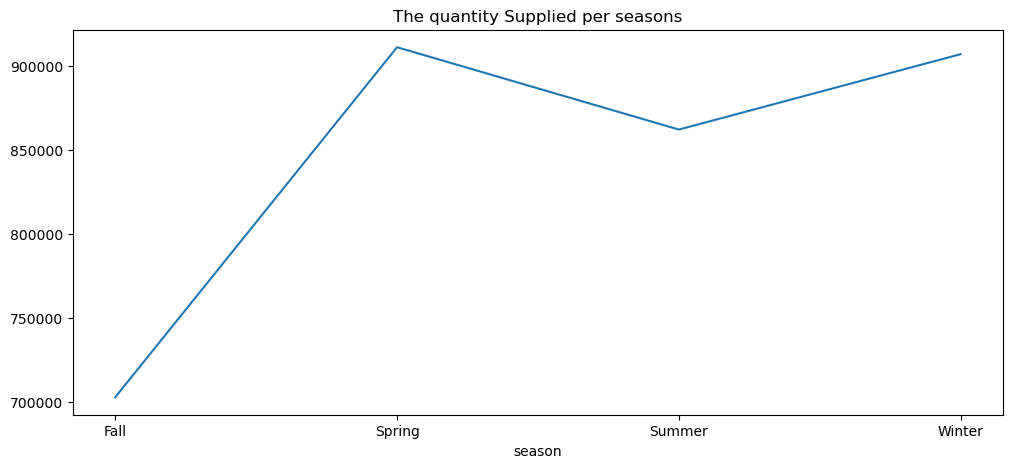

In [83]:
dategroup=Avos.groupby('season').mean()
fig, ax = plt.subplots(figsize=(12,5))
ax.xaxis.set(ticks=range(0,31)) # Manually set x-ticks
dategroup['Total Volume'].plot(x=Avos.Day)
plt.title('The quantity Supplied per seasons')

In [84]:
ten_largest_volume_regions = Avos.groupby(['region'])['Total Volume'].sum().sort_values(ascending=False).reset_index().head(10)
fig = px.bar(ten_largest_volume_regions,x='region', y='Total Volume', title='Top ten regions with the greatest total volume over the time')
fig.show()

 Region Vs AveragePrice distribution
From the graph we can say that Organic Type Avocado prices are high in HartfordSpringfield and Sanfrancisco region.
For Conventional Type we have an average price < 1.50$.

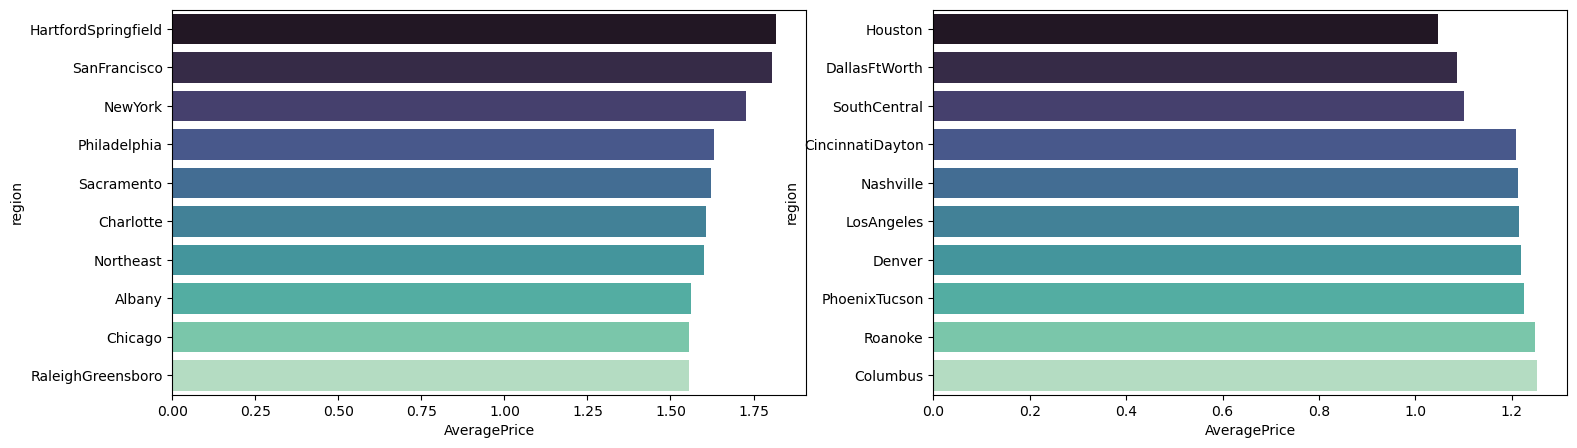

The most expensive avocados can be found in ['HartfordSpringfield', 'SanFrancisco', 'NewYork', 'Philadelphia', 'Sacramento'] 
The cheapest avocados can be found in ['Houston', 'DallasFtWorth', 'SouthCentral', 'CincinnatiDayton', 'Nashville'] 


In [85]:
fig, ax = plt.subplots(1, 2, figsize=(18,5))

regionP = Avos.groupby('region')['AveragePrice'].mean()

expensive = regionP.sort_values(ascending = False).iloc[:10]
cheap = regionP.sort_values().iloc[:10]

sns.barplot(x='AveragePrice', y='region', data = Avos, order=expensive.index, ci=None, palette='mako', ax=ax[0])
sns.barplot(x='AveragePrice', y='region', data = Avos, order=cheap.index, ci=None, palette='mako', ax=ax[1])

plt.show()

cheap = pd.DataFrame(cheap).reset_index()
expensive = pd.DataFrame(expensive).reset_index()

print('The most expensive avocados can be found in {} '.format(list(expensive.iloc[:5,0])))
print('The cheapest avocados can be found in {} '.format(list(cheap.iloc[:5,0])))

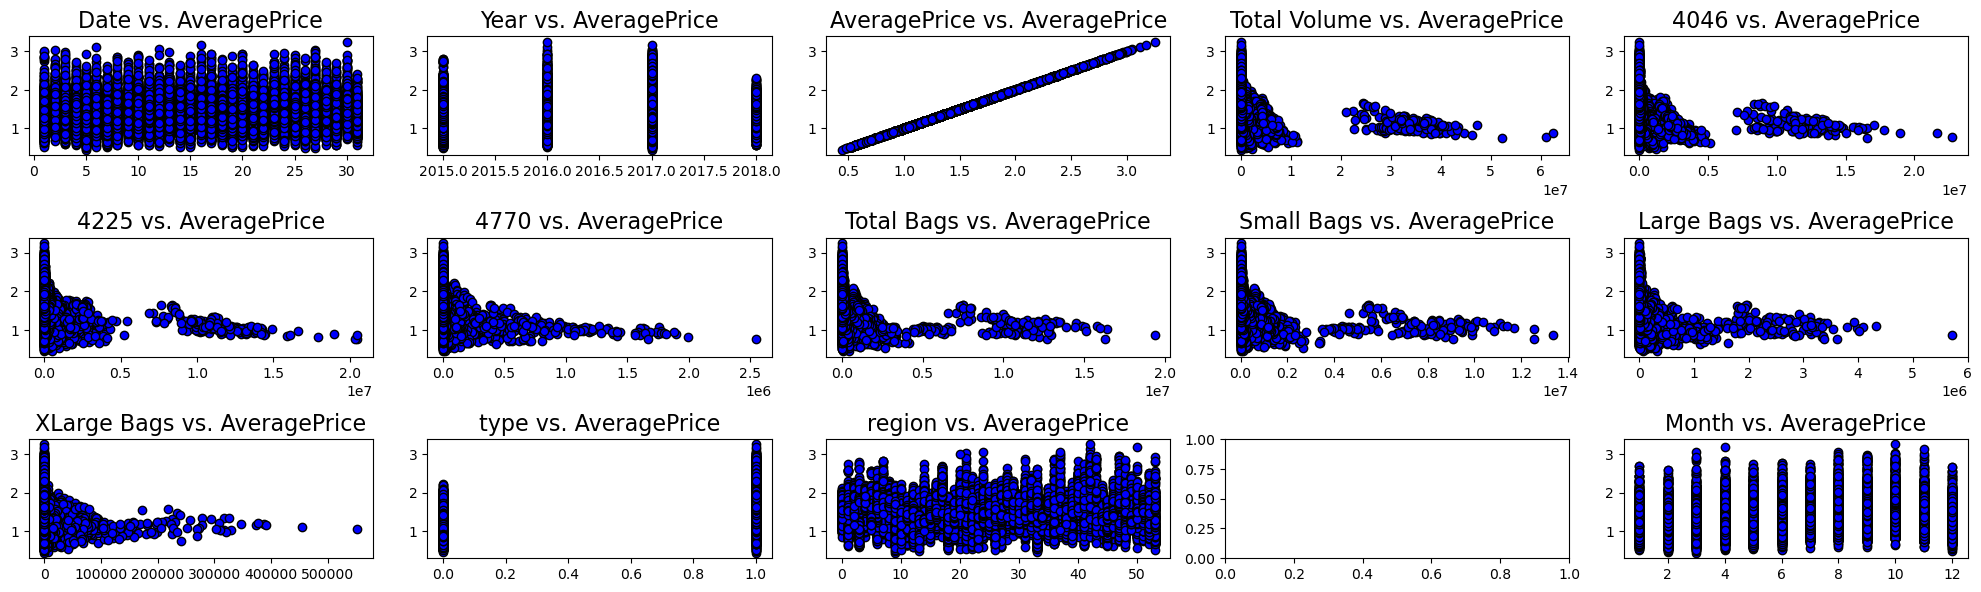

In [12]:
fig, axs = plt.subplots(3,5, figsize=(20,6),)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()

for index, column in enumerate(Avos.columns):
    axs[index-1].set_title("{} vs. AveragePrice".format(column),fontsize=16)
    axs[index-1].scatter(x=Avos[column],y=Avos['AveragePrice'],color='blue',edgecolor='k')

fig.tight_layout(pad=1)

<AxesSubplot:>

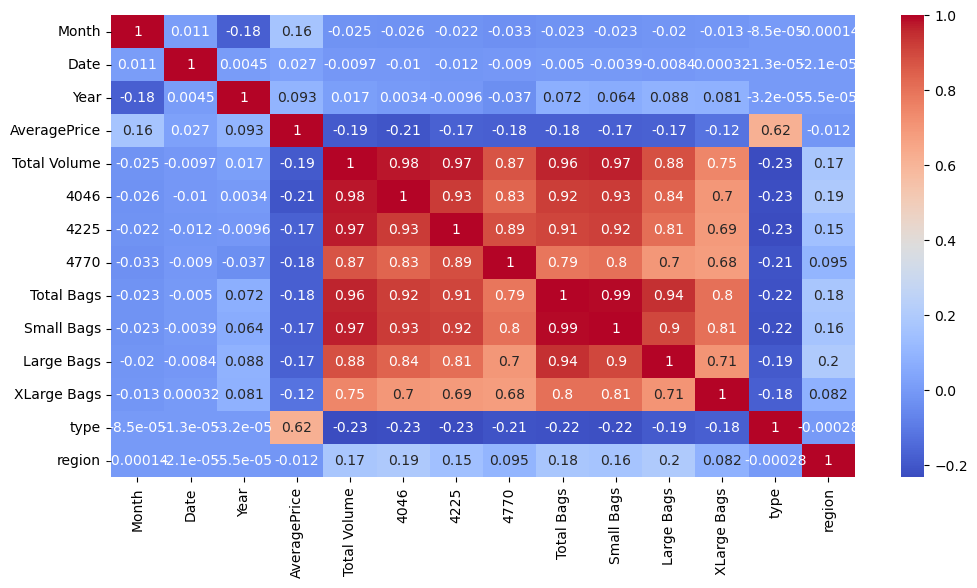

In [13]:
plt.figure(figsize=(12,6))
sns.heatmap(Avos.corr(),cmap='coolwarm',annot=True)

There is a high correlation between pairs:

4046 & total volume (0.98)
4225 & total volume (0.97)
4770 & total volume (0.87)
total bags & total volume (0.96)
small bags & total bags (0.99) etc

4046 avocados are the most preferred/sold type in the US and customers tend to buy those avocados as bulk, not bag.

Retailers want to increase the sales of bagged avocados instead of bulks. They think this is more advantageous for them.

Total Bags variable has a very high correlation with Total Volume (Total Sales) and Small Bags, so we can say that most of the bagged sales comes from the small bags.

###### installing the sklearn library 

In [47]:
!pip install sklearn

##### Fitting the Multivariate Regression Model

In `sklearn`, fitting a multiple linear regression model is much the same as fitting a simple linear regression. This time, of course, our $X$ contains multiple columns, where it only contained one before. 

Random Forest 

In [25]:




# split predictors and response
x = Avos.drop(['AveragePrice'], axis=1)
#x = Avos['Month'].mean()
y = Avos['AveragePrice']

 
scaler= StandardScaler()


 
# standardization 
scale = scaler.fit_transform(x) 
# print(type(scale))


new_x = pd.DataFrame(scale, columns = ['Month','Date','Year','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','type','region'])
# print(new_x)

# create model object
lm = RandomForestRegressor()



# split into train and test
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.10, 
                                                    random_state=1)

# train model
lm.fit(X_train, y_train)



print("RANDOM FOREST ")
y_pred = lm.predict(X_train)
print("predicted values train ",y_pred)

y_pred2 = lm.predict(X_test)
print("predicted values test ",y_pred2)

print("R2 score: ", lm.score(X_train, y_train))



RANDOM FOREST 
predicted values train  [1.102  1.2859 1.2005 ... 0.8133 1.6256 1.2188]
predicted values test  [1.9271 1.0322 1.3139 ... 1.8325 1.346  1.204 ]
R2 score:  0.9851927521809136


In [32]:


# split predictors and response
x = Avos.drop(['AveragePrice'], axis=1)
#x = Avos['Month'].mean()
y = Avos['AveragePrice']

 
scaler= StandardScaler()
 
# Splitting the independent and dependent variables

 
# standardization 
scale = scaler.fit_transform(x) 

new_x = pd.DataFrame(scale, columns = ['Month','Date','Year','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','type','region'])

# create model object
lm = DecisionTreeRegressor()

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.10, 
                                                    random_state=1)

# train model
lm.fit(X_train, y_train)
print('Decision Tree Regressor')
y_pred = lm.predict(X_train)
print("predicted values train ",y_pred)

y_pred2 = lm.predict(X_test)
print("predicted values test ",y_pred2)

print("R2 score: ", lm.score(X_train, y_train))

Decision Tree Regressor
predicted values train  [1.09 1.27 1.24 ... 0.82 1.57 1.24]
predicted values test  [2.06 1.01 1.15 ... 1.78 1.36 1.24]
R2 score:  1.0


In [33]:

# split predictors and response
x = Avos.drop(['AveragePrice'], axis=1)
#x = Avos['Month'].mean()
y = Avos['AveragePrice']
 
scaler= StandardScaler()

 
# standardization 
scale = scaler.fit_transform(x)


new_x = pd.DataFrame(scale, columns = ['Month','Date','Year','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','type','region'])

# create model object
lm = KNeighborsRegressor()

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.10, 
                                                    random_state=1)

# train model
lm.fit(X_train, y_train)

print("KNeighbors Regressor")

y_pred = lm.predict(X_train)
print("predicted values train ",y_pred)

y_pred2 = lm.predict(X_test)
print("predicted values test ",y_pred2)

print("R2 score: ", lm.score(X_train, y_train))

KNeighbors Regressor
predicted values train  [1.108 1.246 1.174 ... 0.842 1.848 1.264]
predicted values test  [2.042 1.12  1.2   ... 1.904 1.36  1.202]
R2 score:  0.7812543138187924


In [36]:
# split predictors and response
x = Avos.drop(['AveragePrice'], axis=1)
#x = Avos['Month'].mean()
y = Avos['AveragePrice']
 
scaler= StandardScaler()

 
# standardization 
scale = scaler.fit_transform(x) 

new_x = pd.DataFrame(scale, columns = ['Month','Date','Year','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','type','region'])


# import regression module


# create model object
lm = Ridge()

# import train/test split module
from sklearn.model_selection import train_test_split

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.10, 
                                                    random_state=1)

# train model
lm.fit(X_train, y_train)

print("Ridge")
y_pred = lm.predict(X_train)
print("predicted values train ",y_pred)

y_pred2 = lm.predict(X_test)
print("predicted values test ",y_pred2)

print("R2 score: ", lm.score(X_train, y_train))

Ridge
predicted values train  [1.40912262 1.07772633 1.16762236 ... 0.78643879 1.62204132 1.14125394]
predicted values test  [1.67166631 1.23768485 1.14724282 ... 1.71290589 1.19705738 1.10627201]


/Users/damac20/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.58098e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [43]:
# split predictors and response
x = Avos.drop(['AveragePrice'], axis=1)
#x = Avos['Month'].mean()
y = Avos['AveragePrice']
 
scaler= StandardScaler()

 
# standardization 
scale = scaler.fit_transform(x) 
print(type(scale))


new_x = pd.DataFrame(scale, columns = ['Month','Date','Year','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','type','region'])

# create model object
lm = Lasso()


# split into train and test
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.10, 
                                                    random_state=1)

# train model
lm.fit(X_train, y_train)
print("LASSO")

y_pred = lm.predict(X_train)
print("predicted values train ",y_pred)

y_pred2 = lm.predict(X_test)
print("predicted values test ",y_pred2)

print("R2 score: ", lm.score(X_train, y_train))

<class 'numpy.ndarray'>
LASSO
predicted values train  [1.66935772 1.40451311 1.41763304 ... 0.99475795 1.42312899 1.45310039]
predicted values test  [1.42435195 1.4231603  1.38612878 ... 1.42365991 1.43356803 1.40503335]
R2 score:  0.050921069571089106


/Users/damac20/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.871e+01, tolerance: 2.662e-01
  model = cd_fast.enet_coordinate_descent(


In [38]:
# split predictors and response
x = Avos.drop(['AveragePrice'], axis=1)
#x = Avos['Month'].mean()
y = Avos['AveragePrice']
from sklearn.preprocessing import StandardScaler
 
scaler= StandardScaler()

# standardization 
scale = scaler.fit_transform(x) 
print(type(scale))


new_x = pd.DataFrame(scale, columns = ['Month','Date','Year','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','type','region'])


# create model object
lm = LinearRegression()

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.10, 
                                                    random_state=1)

# train model
lm.fit(X_train, y_train)

print("Linear Regressor")

y_pred = lm.predict(X_train)
print("predicted values train ",y_pred)

y_pred2 = lm.predict(X_test)
print("predicted values test ",y_pred2)

print("R2 score: ", lm.score(X_train, y_train))

<class 'numpy.ndarray'>
Linear Regressor
predicted values train  [1.40903798 1.07765927 1.16756567 ... 0.78641725 1.62210169 1.14118506]
predicted values test  [1.67172683 1.23762455 1.14718944 ... 1.71297218 1.19700312 1.106207  ]
R2 score:  0.43956722789805713
